## 6. Formación de un modelo de predicción de series temporales basado en RNN

A partir del código base proporcionado, se completa la construcción de un modelo de predicción de series temporales utilizando una **Red Neuronal Recurrente (RNN)**. El modelo recibe una serie de datos escalados y aprende a predecir el valor futuro con base en ventanas de observaciones pasadas.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#? Lectura de datos 
df = pd.read_csv(r'./data_boston.csv', 
                header='infer',
                encoding='latin1')
df = df[['PRICE']]

In [4]:
#? Escalar los datos
scaler = MinMaxScaler()
scaleddata = scaler.fit_transform(df)

In [5]:
#? Crear datos de entrada para RNN 
def crear_secuencias(data, lensec=5):
    """Creacion de datos de entrada
    data = datos a introducir
    lensec = secuencia de datos por defecto 5"""
    X, y = [], []
    for i in range (len(data) - lensec):
        X.append(data[i:i+lensec])
        y.append(data[i+lensec])
    return np.array(X), np.array(y)
lensecuencias = 5
X, y = crear_secuencias(scaleddata)

In [6]:
#? Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle=False)

In [7]:
#? Parámetros de entrenamiento
batch_size = 1
n_epochs = 1_000
learn_rate = 0.0001

In [8]:
#? Definicion del modelo RNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(lensecuencias, 1)))
model.add(tf.keras.layers.Dense(1))  

c:\Users\chapu\Documents\Repositorios2\Samsung_InovationCampus\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#? Compilar modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),
            loss='mse')

In [10]:
#? Entrenar modelo
history = model.fit(X_train, y_train, 
                    epochs=n_epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test), 
                    verbose=1)


Epoch 1/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0484 - val_loss: 0.0103
Epoch 2/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0243 - val_loss: 0.0107
Epoch 3/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0288 - val_loss: 0.0112
Epoch 4/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 - val_loss: 0.0096
Epoch 5/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0226 - val_loss: 0.0091
Epoch 6/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0263 - val_loss: 0.0097
Epoch 7/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 - val_loss: 0.0093
Epoch 8/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232 - val_loss: 0.0093
Epoch 9/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0193 - val_loss: 0.0090
Epoch 10/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0207 - val_loss: 0.0118
Epoch 11/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0204 - val_loss: 0.0091
Epoch 12/1000
400/400 ━━━━━━━━

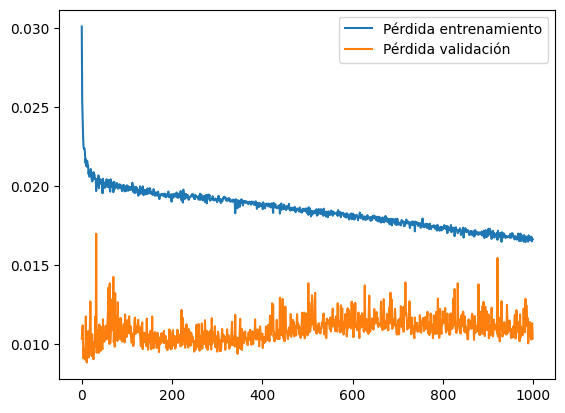

In [11]:
#? Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.show()

In [12]:
# Predicción final para verificar funcionamiento
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
